Libraries

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

Open vulnerability files

In [2]:
# read json
with open('../../../data/tweets_vips_annotated.json') as f:
    propaganda_tweets = json.load(f)

with open('../../../data/propaganda_nonswingers.json') as f:
    vulnerable_nonswingers = json.load(f)

Merge with metadata

In [3]:
# count how many tweets are propaganda
propaganda_tweets_count = 0
for tweet in propaganda_tweets:
    if 'annotations' in propaganda_tweets[tweet]:
        propaganda_tweets_count += 1

print(f"Number of propaganda tweets: {propaganda_tweets_count}")

Number of propaganda tweets: 11849


# General swing patterns

In [4]:
start_before = '2022-07-01'
start_during = '2022-08-26'
start_after = '2022-09-25'
end_after = '2022-10-31'

## Before-during

In [5]:
# within the swingers before-during, find those that retweet a propaganda tweet before
bd_vulnerable_before = []
for tweet in vulnerable_nonswingers:
    for user in vulnerable_nonswingers[tweet]:
        if user[1]=="BD" and user[2] < start_during:
            bd_vulnerable_before.append([user[0], tweet])

print(f"Number of BD non swingers that retweet propaganda before: {len(bd_vulnerable_before)}")

Number of BD non swingers that retweet propaganda before: 5467


In [6]:

bd_vulnerable_during = []
for tweet in vulnerable_nonswingers:
    for user in vulnerable_nonswingers[tweet]:
        if user[1]=="BD" and user[2] >= start_during and user[2] < start_after:
            bd_vulnerable_during.append([user[0], tweet])

print(f"Number of BD non swingers that retweet propaganda during: {len(bd_vulnerable_during)}")

Number of BD non swingers that retweet propaganda during: 1622


## During-after


In [7]:
da_vulnerable_during = []
for tweet in vulnerable_nonswingers:
    for user in vulnerable_nonswingers[tweet]:
        if user[1]=="DA" and user[2] >= start_during and user[2] < start_after:
            da_vulnerable_during.append([user[0], tweet])

print(f"Number of DA non swingers that retweet propaganda during: {len(da_vulnerable_during)}")

Number of DA non swingers that retweet propaganda during: 15766


In [8]:
da_vulnerable_after = []
for tweet in vulnerable_nonswingers:
    for user in vulnerable_nonswingers[tweet]:
        if user[1]=="DA" and user[2] >= start_after:
            da_vulnerable_after.append([user[0], tweet])

print(f"Number of DA non swingers that retweet propaganda after: {len(da_vulnerable_after)}")

Number of DA non swingers that retweet propaganda after: 5123


## Before-after

In [9]:
ba_vulnerable_before = []
for tweet in vulnerable_nonswingers:
    for user in vulnerable_nonswingers[tweet]:
        if user[1]=="BA" and user[2] < start_during:
            ba_vulnerable_before.append([user[0], tweet])

print(f"Number of BA non swingers that retweet propaganda before: {len(ba_vulnerable_before)}")

Number of BA non swingers that retweet propaganda before: 16157


In [10]:
ba_vulnerable_after = []
for tweet in vulnerable_nonswingers:
    for user in vulnerable_nonswingers[tweet]:
        if user[1]=="BA" and user[2] >= start_after:
            ba_vulnerable_after.append([user[0], tweet])

print(f"Number of BA non swingers that retweet propaganda after: {len(ba_vulnerable_after)}")

Number of BA non swingers that retweet propaganda after: 5204


In general, all non swinger groups tend to retweet more propaganda before the non-swing. The ratio is generally higher than 3.

In absolute terms, non-swingers retweet less propaganda than swingers.

# Focus on techniques

## Before-during

Which techniques are non-swingers from before to during more vulnerable to?

In [11]:
# match second element of sublists in bd_vulnerable_before with the annotations in propaganda_tweets
bd_vulnerable_before_annotations = []
for user in bd_vulnerable_before:
    for tweet in propaganda_tweets:
        if user[1] == tweet:
            if "annotations" in propaganda_tweets[tweet]:
                bd_vulnerable_before_annotations.append([user[0], [sub["label"] for sub in propaganda_tweets[tweet]['annotations']]])

In [12]:
# bd_vulnerable_before_annotations = [[x[0], list(set(x[1]))] for x in bd_vulnerable_before_annotations]

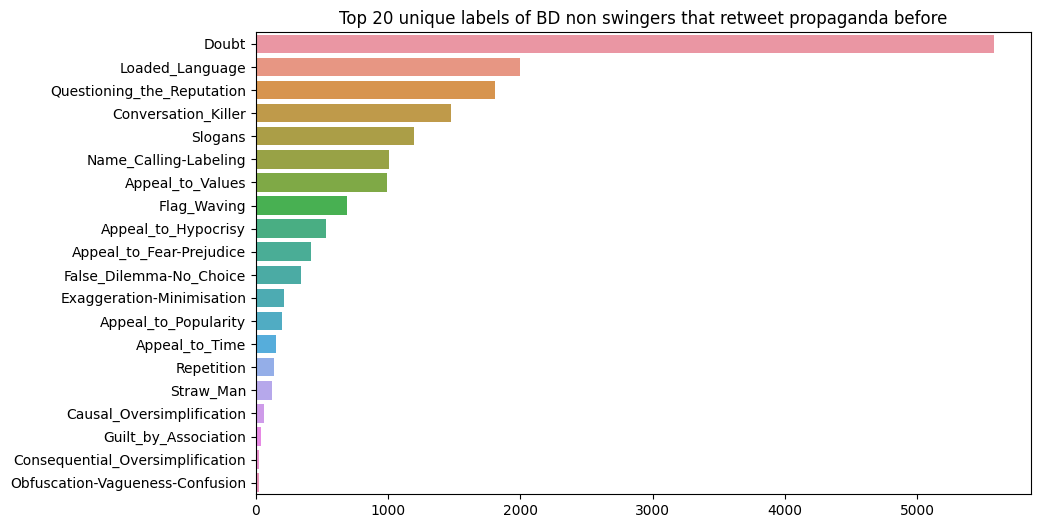

In [13]:
# explode the list of labels and count the occurrences
bd_vulnerable_before_labels = [label for sublist in bd_vulnerable_before_annotations for label in sublist[1]]
bd_vulnerable_before_labels_count = pd.Series(bd_vulnerable_before_labels).value_counts()

# plot top 20 unique labels
plt.figure(figsize=(10, 6))
sns.barplot(x=bd_vulnerable_before_labels_count[:20], y=bd_vulnerable_before_labels_count[:20].index)
plt.title('Top 20 unique labels of BD non swingers that retweet propaganda before')
plt.show()

In [14]:
# match second element of sublists in bd_vulnerable_before with the annotations in propaganda_tweets
bd_vulnerable_during_annotations = []
for user in bd_vulnerable_during:
    for tweet in propaganda_tweets:
        if user[1] == tweet:
            if "annotations" in propaganda_tweets[tweet]:
                bd_vulnerable_during_annotations.append([user[0], [sub["label"] for sub in propaganda_tweets[tweet]['annotations']]])

In [29]:
# bd_vulnerable_during_annotations = [[x[0], list(set(x[1]))] for x in bd_vulnerable_during_annotations]

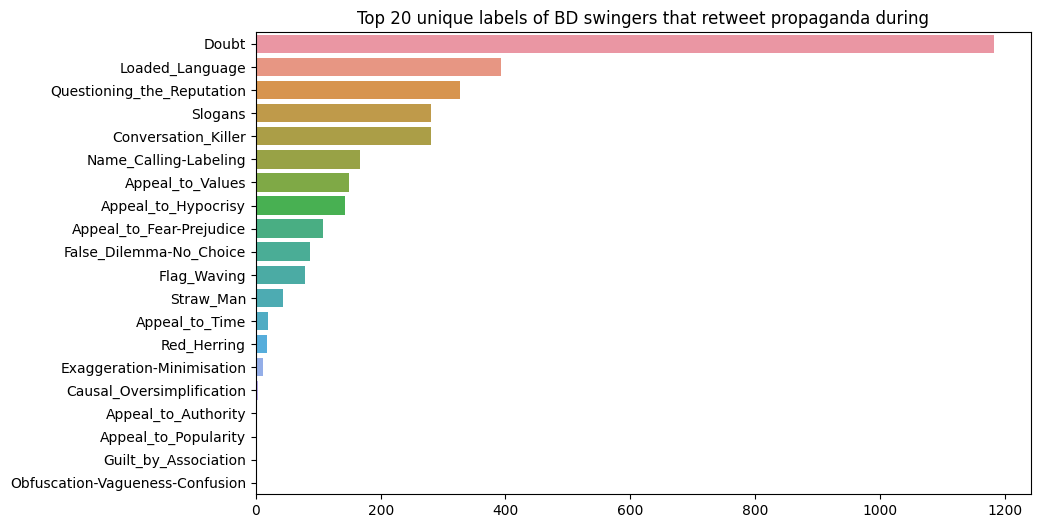

In [15]:
# explode the list of labels and count the occurrences
bd_vulnerable_during_labels = [label for sublist in bd_vulnerable_during_annotations for label in sublist[1]]
bd_vulnerable_during_labels_count = pd.Series(bd_vulnerable_during_labels).value_counts()

# plot top 20 unique labels
plt.figure(figsize=(10, 6))
sns.barplot(x=bd_vulnerable_during_labels_count[:20], y=bd_vulnerable_during_labels_count[:20].index)
plt.title('Top 20 unique labels of BD swingers that retweet propaganda during')
plt.show()

## During-after

In [16]:
# match second element of sublists in bd_vulnerable_before with the annotations in propaganda_tweets
da_vulnerable_during_annotations = []
for user in da_vulnerable_during:
    for tweet in propaganda_tweets:
        if user[1] == tweet:
            if "annotations" in propaganda_tweets[tweet]:
                da_vulnerable_during_annotations.append([user[0], [sub["label"] for sub in propaganda_tweets[tweet]['annotations']]])

In [32]:
# da_vulnerable_during_annotations = [[x[0], list(set(x[1]))] for x in da_vulnerable_during_annotations]

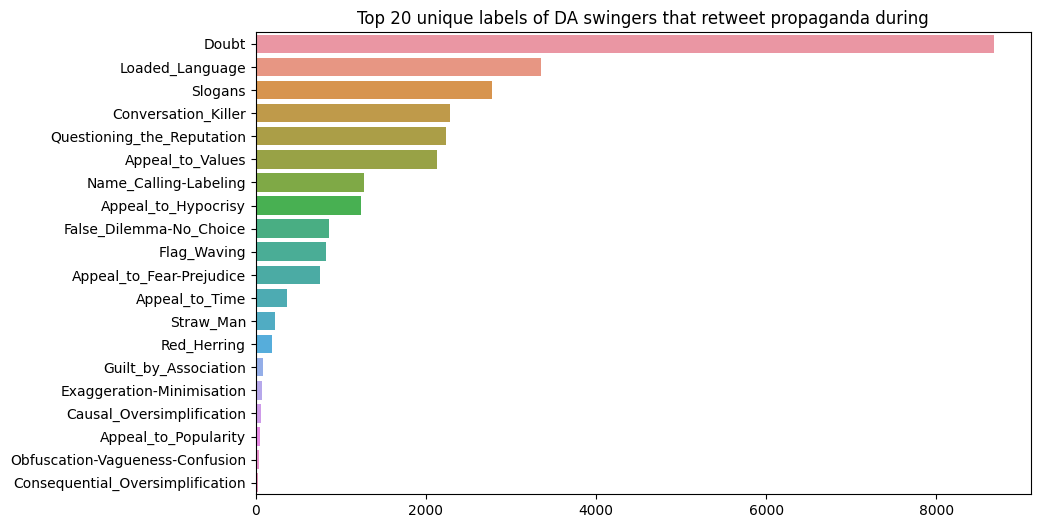

In [17]:
# explode the list of labels and count the occurrences
da_vulnerable_during_labels = [label for sublist in da_vulnerable_during_annotations for label in sublist[1]]
da_vulnerable_during_labels_count = pd.Series(da_vulnerable_during_labels).value_counts()

# plot top 20 unique labels
plt.figure(figsize=(10, 6))
sns.barplot(x=da_vulnerable_during_labels_count[:20], y=da_vulnerable_during_labels_count[:20].index)
plt.title('Top 20 unique labels of DA swingers that retweet propaganda during')
plt.show()

In [18]:
# match second element of sublists in bd_vulnerable_before with the annotations in propaganda_tweets
da_vulnerable_after_annotations = []
for user in da_vulnerable_after:
    for tweet in propaganda_tweets:
        if user[1] == tweet:
            if "annotations" in propaganda_tweets[tweet]:
                da_vulnerable_after_annotations.append([user[0], [sub["label"] for sub in propaganda_tweets[tweet]['annotations']]])

In [35]:
# da_vulnerable_after_annotations = [[x[0], list(set(x[1]))] for x in da_vulnerable_after_annotations]

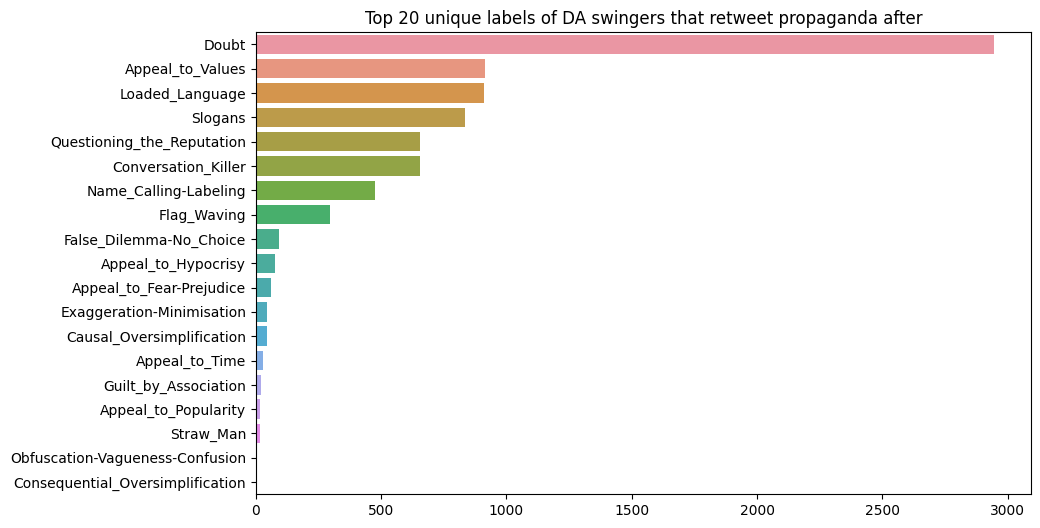

In [19]:
# explode the list of labels and count the occurrences
da_vulnerable_after_labels = [label for sublist in da_vulnerable_after_annotations for label in sublist[1]]
da_vulnerable_after_labels_count = pd.Series(da_vulnerable_after_labels).value_counts()

# plot top 20 unique labels
plt.figure(figsize=(10, 6))
sns.barplot(x=da_vulnerable_after_labels_count[:20], y=da_vulnerable_after_labels_count[:20].index)
plt.title('Top 20 unique labels of DA swingers that retweet propaganda after')
plt.show()

## Before-after

In [20]:
# match second element of sublists in bd_vulnerable_before with the annotations in propaganda_tweets
ba_vulnerable_before_annotations = []
for user in ba_vulnerable_before:
    for tweet in propaganda_tweets:
        if user[1] == tweet:
            if "annotations" in propaganda_tweets[tweet]:
                ba_vulnerable_before_annotations.append([user[0], [sub["label"] for sub in propaganda_tweets[tweet]['annotations']]])

In [38]:
# ba_vulnerable_before_annotations = [[x[0], list(set(x[1]))] for x in ba_vulnerable_before_annotations]

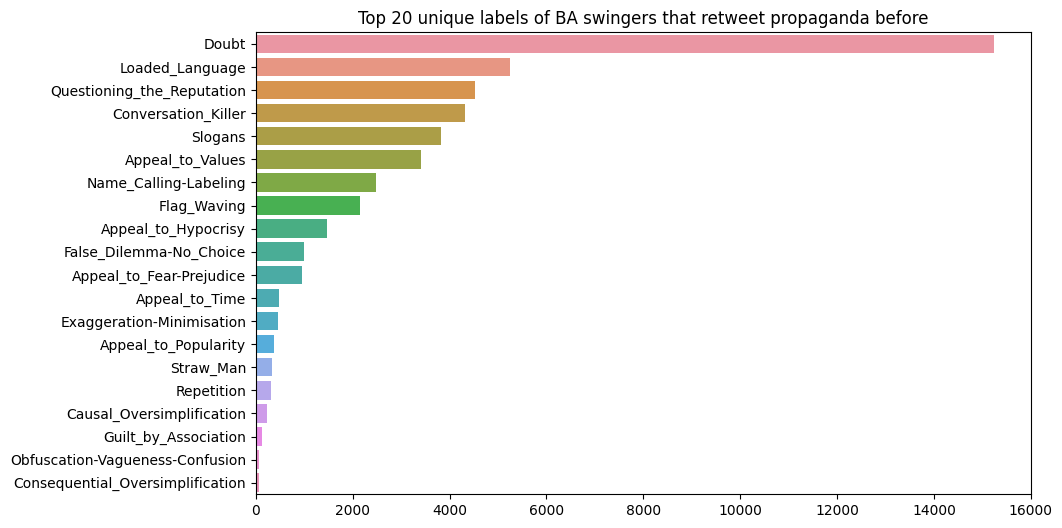

In [21]:
# explode the list of labels and count the occurrences
ba_vulnerable_before_labels = [label for sublist in ba_vulnerable_before_annotations for label in sublist[1]]
ba_vulnerable_before_labels_count = pd.Series(ba_vulnerable_before_labels).value_counts()

# plot top 20 unique labels
plt.figure(figsize=(10, 6))
sns.barplot(x=ba_vulnerable_before_labels_count[:20], y=ba_vulnerable_before_labels_count[:20].index)
plt.title('Top 20 unique labels of BA swingers that retweet propaganda before')
plt.show()

In [22]:
# match second element of sublists in bd_vulnerable_before with the annotations in propaganda_tweets
ba_vulnerable_after_annotations = []
for user in ba_vulnerable_after:
    for tweet in propaganda_tweets:
        if user[1] == tweet:
            if "annotations" in propaganda_tweets[tweet]:
                ba_vulnerable_after_annotations.append([user[0], [sub["label"] for sub in propaganda_tweets[tweet]['annotations']]])

In [41]:
# ba_vulnerable_after_annotations = [[x[0], list(set(x[1]))] for x in ba_vulnerable_after_annotations]

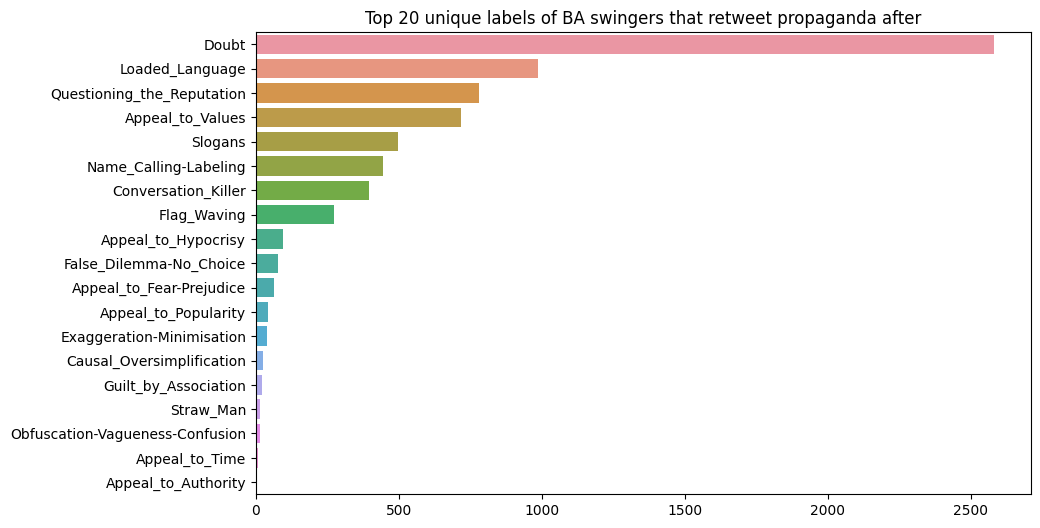

In [23]:
# explode the list of labels and count the occurrences
ba_vulnerable_after_labels = [label for sublist in ba_vulnerable_after_annotations for label in sublist[1]]
ba_vulnerable_after_labels_count = pd.Series(ba_vulnerable_after_labels).value_counts()

# plot top 20 unique labels
plt.figure(figsize=(10, 6))
sns.barplot(x=ba_vulnerable_after_labels_count[:20], y=ba_vulnerable_after_labels_count[:20].index)
plt.title('Top 20 unique labels of BA swingers that retweet propaganda after')
plt.show()